# Initialization
# =========================================

In [3]:
import pandas as pd
import mlflow
from mlflow.models import infer_signature
mlflow.set_tracking_uri(uri="http://localhost:8080")

# Load data
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# -------------------- Inspection and clean up -----------------

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0


array(['Female', 'Male'], dtype=object)

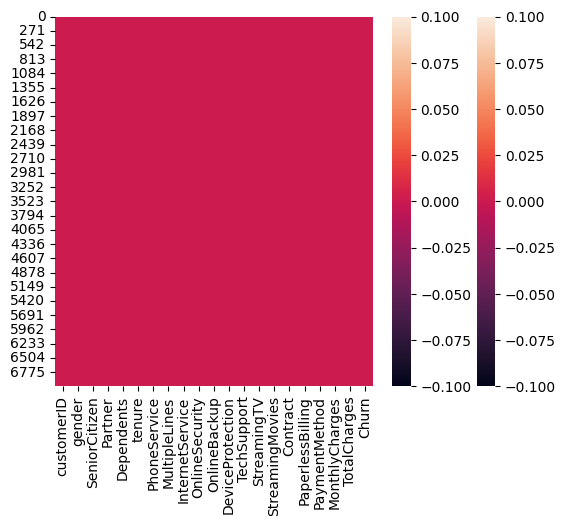

In [4]:
import seaborn as sns
print(df.dtypes)
print(df.isnull().any(axis=1).sum()) # null values
print(df.isnull().sum()) # null values
sns.heatmap(df.isnull())

df = df.dropna()
sns.heatmap(df.isnull())

df.head(5)
df.gender.unique()

# -------------------- Visualisations -----------------

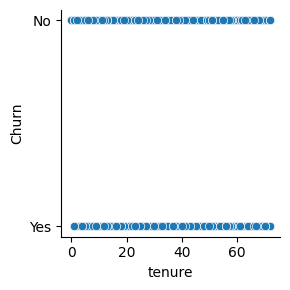

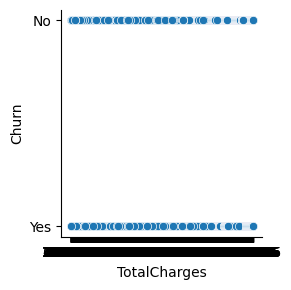

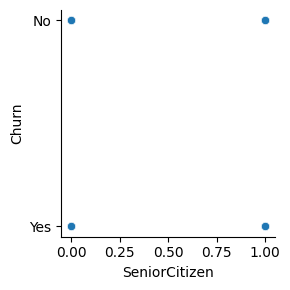

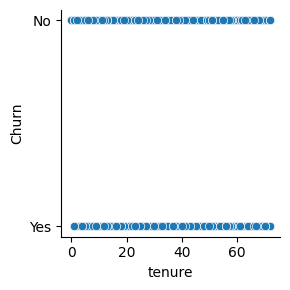

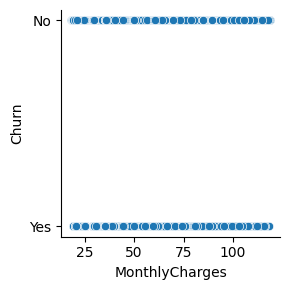

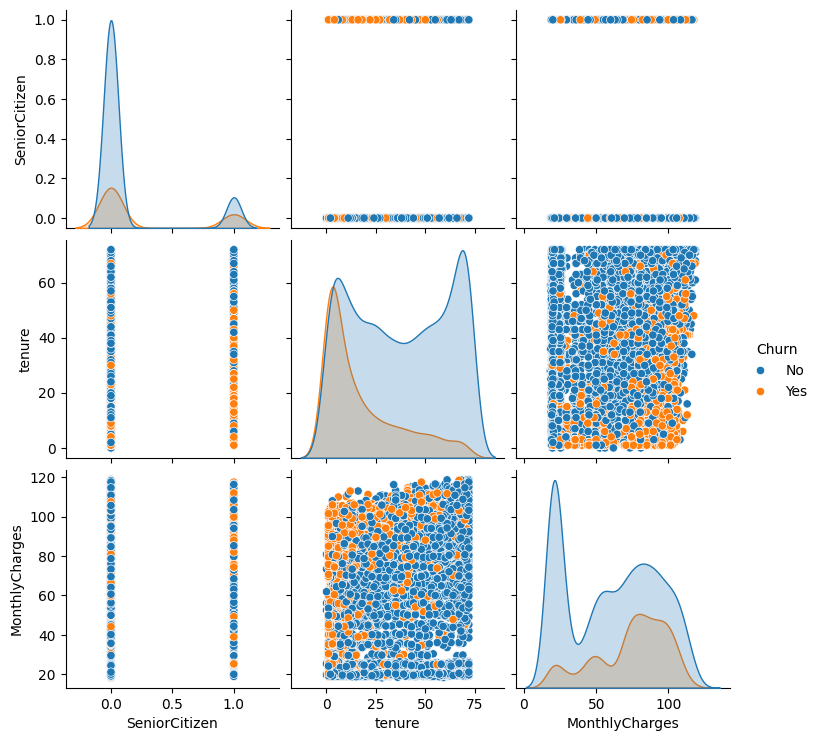

In [5]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

g = sns.FacetGrid(df)
g.map(sns.scatterplot, 'tenure', 'Churn')
g = sns.FacetGrid(df)
g.map(sns.scatterplot, 'TotalCharges', 'Churn')

#all numerical columns
numerical_cols=df.select_dtypes(include=np.number).columns.tolist()
df_cols=df[numerical_cols].columns #.difference(['year','churn'])
for col in df_cols:
    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, col, 'Churn')

sns.pairplot(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']], hue = 'Churn')



customer_id               0
gender_code               0
partner_code              0
dependents_code           0
phone_service_code        0
multiple_lines_code       0
internet_service_code     0
online_security_code      0
online_backup_code        0
device_protection_code    0
tech_support_code         0
streaming_tv_code         0
streaming_movies_code     0
contract_code             0
paperless_billing_code    0
payment_method_code       0
SeniorCitizen             0
tenure                    0
MonthlyCharges            0
total_charges_num         0
churn_num                 0
dtype: int64

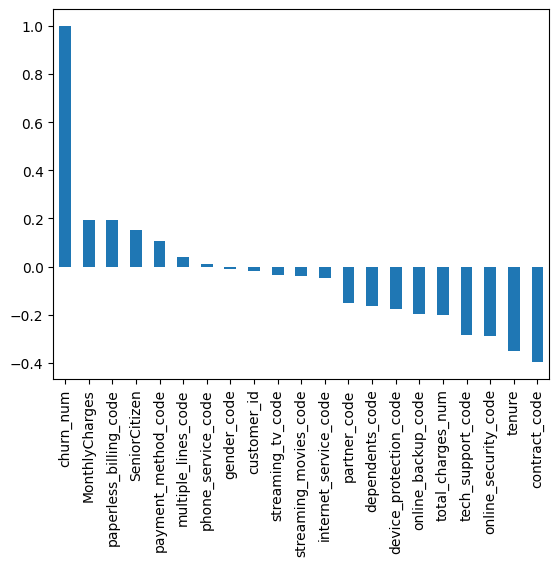

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_enc = df.copy()
df_enc['customer_id'] = ord_enc.fit_transform(df[['customerID']])
df_enc['gender_code'] = ord_enc.fit_transform(df[['gender']])
df_enc['partner_code'] = ord_enc.fit_transform(df[['Partner']])
df_enc['dependents_code'] = ord_enc.fit_transform(df[['Dependents']])
df_enc['phone_service_code'] = ord_enc.fit_transform(df[['PhoneService']])
df_enc['multiple_lines_code'] = ord_enc.fit_transform(df[['MultipleLines']])
df_enc['internet_service_code'] = ord_enc.fit_transform(df[['InternetService']])
df_enc['online_security_code'] = ord_enc.fit_transform(df[['OnlineSecurity']])
df_enc['online_backup_code'] = ord_enc.fit_transform(df[['OnlineBackup']])
df_enc['device_protection_code'] = ord_enc.fit_transform(df[['DeviceProtection']])
df_enc['tech_support_code'] = ord_enc.fit_transform(df[['TechSupport']])
df_enc['streaming_tv_code'] = ord_enc.fit_transform(df[['StreamingTV']])
df_enc['streaming_movies_code'] = ord_enc.fit_transform(df[['StreamingMovies']])
df_enc['contract_code'] = ord_enc.fit_transform(df[['Contract']])
df_enc['paperless_billing_code'] = ord_enc.fit_transform(df[['PaperlessBilling']])
df_enc['payment_method_code'] = ord_enc.fit_transform(df[['PaymentMethod']])
df_enc['churn_num'] = ord_enc.fit_transform(df[['Churn']])
df_enc['total_charges_num'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df_enc.isnull().sum()
df_enc_sel = df_enc[['customer_id','gender_code','partner_code','dependents_code', 'phone_service_code', 'multiple_lines_code', 'internet_service_code',
        'online_security_code', 'online_backup_code', 'device_protection_code', 'tech_support_code', 'streaming_tv_code',
        'streaming_movies_code','contract_code','paperless_billing_code','payment_method_code',
        'SeniorCitizen','tenure','MonthlyCharges','total_charges_num','churn_num']]
df_enc_sel.corr()['churn_num'].sort_values(ascending = False).plot(kind='bar')
df_enc_sel = df_enc_sel.dropna()
df_enc_sel.isnull().sum()

In [8]:
df_enc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,online_backup_code,device_protection_code,tech_support_code,streaming_tv_code,streaming_movies_code,contract_code,paperless_billing_code,payment_method_code,churn_num,total_charges_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,151.65


In [9]:
df_enc_sel.head()

,customer_id,gender_code,partner_code,dependents_code,phone_service_code,multiple_lines_code,internet_service_code,online_security_code,online_backup_code,device_protection_code,...,streaming_tv_code,streaming_movies_code,contract_code,paperless_billing_code,payment_method_code,SeniorCitizen,tenure,MonthlyCharges,total_charges_num,churn_num
0,5375.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0,1,29.85,29.85,0.0
1,3962.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1.0,0.0,3.0,0,34,56.95,1889.50,0.0
2,2564.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0,2,53.85,108.15,1.0
3,5535.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0,45,42.30,1840.75,0.0
4,6511.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0,2,70.70,151.65,1.0


# -------------------- Run Logistic regression -----------------

# logistic regression using statsmodels

In [14]:
import statsmodels.api as sm
X=df_enc_sel[df_enc_sel[df_enc_sel.select_dtypes(include=np.number).columns.tolist()].columns.difference(['customer_id','churn_num'])]
y=df_enc_sel['churn_num']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

import math
math.exp(0.3336)

Optimization terminated successfully.
         Current function value: 0.416779
         Iterations 8
                            Results: Logit
Model:                 Logit              Method:             MLE      
Dependent Variable:    churn_num          Pseudo R-squared:   0.280    
Date:                  2025-04-28 19:02   AIC:                5899.5758
No. Observations:      7032               BIC:                6029.8821
Df Model:              18                 Log-Likelihood:     -2930.8  
Df Residuals:          7013               LL-Null:            -4071.7  
Converged:             1.0000             LLR p-value:        0.0000   
No. Iterations:        8.0000             Scale:              1.0000   
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
MonthlyCharges          0.0202   0.0020  10.2458 0.0000  0.0164

1.395984638025632

# logistic regression using sklearn

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
params = {
    "random_state" : 13,
}
logreg = LogisticRegression(**params)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(classification_report(y_test, y_pred))
print(f"The area under the curve is: {logit_roc_auc}")

mlflow.set_experiment("Telecom Churn prediction using logistic regression")
with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc)
    mlflow.set_tag("Training Info", "Basic Logistic regression")
    signature = infer_signature(X_train, logreg.predict(X_test))
    model_info = mlflow.sklearn.log_model(
        sk_model=logreg,
        artifact_path="logreg",
        signature=signature,
        input_example=X_train,
        registered_model_name="logreg",
    )


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1555
         1.0       0.63      0.53      0.58       555

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

The area under the curve is: 0.7097534833869239


2025/04/28 19:09:30 INFO mlflow.tracking.fluent: Experiment with name 'Telecom Churn prediction using logistic regression' does not exist. Creating a new experiment.
Successfully registered model 'logreg'.
2025/04/28 19:09:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: logreg, version 1
Created version '1' of model 'logreg'.


# confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
tn, fp, fn, tp = confusion_matrix.ravel()
print(f'TP: {tp} | FN: {fn}')
print(f'FP: {fp} | TN: {tn}')

[[1378  177]
 [ 259  296]]
TP: 296 | FN: 259
FP: 177 | TN: 1378


# ROC Curve

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# Setting the graph area

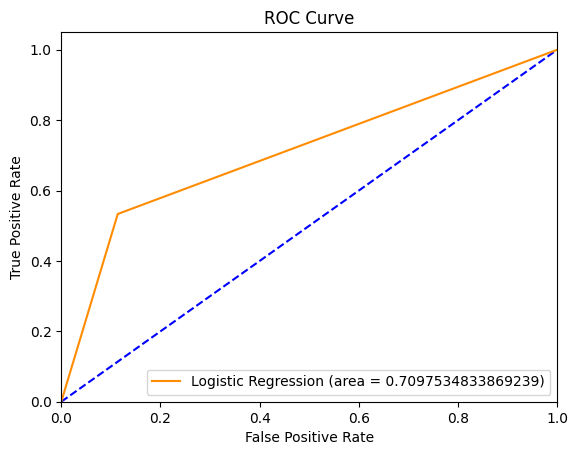

In [20]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
# Plot model we built
plt.plot(fpr, tpr, color='darkorange', label=f'Logistic Regression (area = {logit_roc_auc})')
#Adding labels and etc
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Saving and running model

In [21]:
import pickle
pickle.dump(logreg, open('../model1.pkl', 'wb'))
model = pickle.load(open('../model1.pkl', 'rb'))
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

# class imbalance method 1

In [22]:
params = {
    "random_state" : 13,
    "class_weight" : 'balanced'
}

# logreg_balanced = LogisticRegression(random_state = 13, class_weight = 'balanced')

In [23]:
logreg_balanced = LogisticRegression(**params)
logreg_balanced.fit(X_train, y_train)
y_pred_balanced = logreg_balanced.predict(X_test)
logit_roc_auc_balanced = roc_auc_score(y_test, y_pred_balanced)
print(classification_report(y_test, y_pred))
print(f"The area under the curve is: {logit_roc_auc_balanced}")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc_balanced)
    mlflow.set_tag("Training Info", "Basic Logistic regression model with balanced class")
    signature_balanced = infer_signature(X_train, logreg_balanced.predict(X_test))
    model_info_balanced = mlflow.sklearn.log_model(
        sk_model=logreg_balanced,
        artifact_path="balanced_log_reg",
        signature=signature_balanced,
        input_example=X_train,
        registered_model_name="balanced_log_reg",
    )

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1555
         1.0       0.63      0.53      0.58       555

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

The area under the curve is: 0.7634077807711247


Successfully registered model 'balanced_log_reg'.
2025/04/28 19:12:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: balanced_log_reg, version 1
Created version '1' of model 'balanced_log_reg'.


# class imbalance method 2

In [24]:
params = {
    "random_state" : 13,
    "class_weight" : {0:90, 1:10}
}
logreg_custom_ = LogisticRegression(**params)
logreg_custom_.fit(X_train, y_train)
y_pred_custom_ = logreg_custom_.predict(X_test)
logit_roc_auc_custom_ = roc_auc_score(y_test, y_pred_custom_)
print(classification_report(y_test, y_pred_custom_))
print(f"The area under the curve is: {logit_roc_auc_custom_}")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc_custom_)
    mlflow.set_tag("Training Info", "Basic Logistic regression model with custom class weights")
    signature_balanced = infer_signature(X_train, logreg_balanced.predict(X_test))
    model_info_balanced = mlflow.sklearn.log_model(
        sk_model=logreg_custom_,
        artifact_path="custom_class_weights_log_reg",
        signature=signature_balanced,
        input_example=X_train,
        registered_model_name="custom_class_weights_log_reg",
    )

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1555
         1.0       0.00      0.00      0.00       555

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.74      0.63      2110

The area under the curve is: 0.5


Successfully registered model 'custom_class_weights_log_reg'.
2025/04/28 19:13:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: custom_class_weights_log_reg, version 1
Created version '1' of model 'custom_class_weights_log_reg'.


# class imbalance method 3

In [25]:
from sklearn.utils import resample
X_resample = pd.concat([X_train, y_train], axis=1)

# separate the 2 classes

In [26]:
class0 = X_resample[X_resample['churn_num']==0]
class1 = X_resample[X_resample['churn_num']==1]

# Case 1 - bootstraps from the minority class

In [29]:
if len(class1)<len(class0):
    resampled = resample(class1,replace=True,n_samples=len(class0),random_state=10)
    resampled_df = pd.concat([resampled, class0])
# Case 1 - ressamples from the majority class
else:
    resampled = resample(class1,replace=False,n_samples=len(class0),random_state=10)
    resampled_df = pd.concat([resampled, class0])

params = {
    "random_state":13
}
logreg_resampled = LogisticRegression(**params)

X=resampled_df[resampled_df[resampled_df.select_dtypes(include=np.number).columns.tolist()].columns.difference(['customer_id','churn_num'])]
y=resampled_df['churn_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg_resampled.fit(X_train, y_train)
y_pred_resampled = logreg_resampled.predict(X_test)
logit_roc_auc_resampled = roc_auc_score(y_test, y_pred_resampled)
print(classification_report(y_test, y_pred_resampled))
print(f"The area under the curve is: {logit_roc_auc_resampled}")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc_resampled)
    mlflow.set_tag("Training Info", "Logistic regression model with resample to fix imbalanced data")
    signature_resampled = infer_signature(X_train, logreg_balanced.predict(X_test))
    model_info_balanced = mlflow.sklearn.log_model(
        sk_model=logreg_resampled,
        artifact_path="logreg_resampled",
        signature=signature_resampled,
        input_example=X_train,
        registered_model_name="logreg_resampled",
    )

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1092
         1.0       0.74      0.81      0.78      1073

    accuracy                           0.77      2165
   macro avg       0.77      0.77      0.77      2165
weighted avg       0.77      0.77      0.77      2165

The area under the curve is: 0.7666934649693271


Successfully registered model 'logreg_resampled'.
2025/04/28 19:15:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: logreg_resampled, version 1
Created version '1' of model 'logreg_resampled'.


# class imbalance method 4

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, sampling_strategy=1.0)

X=df_enc_sel[df_enc_sel[df_enc_sel.select_dtypes(include=np.number).columns.tolist()].columns.difference(['customer_id','churn_num'])]
y=df_enc_sel['churn_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
params = {
    "random_state":13
}
logreg_smote = LogisticRegression(**params)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg_smote.predict(X_test)
logit_roc_auc_smote = roc_auc_score(y_test, y_pred_smote)
print(classification_report(y_test, y_pred_smote))
print(f"The area under the curve is: {logit_roc_auc_smote}")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc_smote)
    mlflow.set_tag("Training Info", "Logistic regression model with SMOTE to fix imbalanced data")
    signature_smote = infer_signature(X_train_smote, logreg_balanced.predict(X_test))
    model_info_smote = mlflow.sklearn.log_model(
        sk_model=logreg_smote,
        artifact_path="logreg_smote",
        signature=signature_smote,
        input_example=X_train_smote,
        registered_model_name="logreg_smote",
    )


              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81      1555
         1.0       0.52      0.79      0.62       555

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

The area under the curve is: 0.7633411546594827


Successfully registered model 'logreg_smote'.
2025/04/28 19:30:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: logreg_smote, version 1
Created version '1' of model 'logreg_smote'.


# -------------------- Feature selection -----------------

# method 1 VarianceThreshold

In [31]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
var_thr = VarianceThreshold(threshold = 1)
var_thr.fit(X_scaled)
var_thr.get_support()
selected_cols = X.columns[var_thr.get_support()]

X_threshold_cols=df_enc_sel[['dependents_code', 'device_protection_code', 'online_backup_code',
                     'partner_code', 'payment_method_code', 'streaming_movies_code',
                     'streaming_tv_code']]
y=df_enc_sel['churn_num']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_threshold_cols, y, test_size=0.3, random_state=0)
sm = SMOTE(random_state=0, sampling_strategy=1.0)
X_train_, y_train_ = sm.fit_resample(X_train_, y_train_)
params = {
    "random_state":13
}
logreg_smote_t = LogisticRegression(**params)
logreg_smote_t.fit(X_train_, y_train_)
y_pred_smote_t = logreg_smote_t.predict(X_test_)
logit_roc_auc_smote_t = roc_auc_score(y_test_, y_pred_smote_t)
print(classification_report(y_test_, y_pred_smote_t))
print(f"The area under the curve is: {logit_roc_auc_smote_t}")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc_smote_t)
    mlflow.set_tag("Training Info", "Logistic regression model with SMOTE & thresholding for feature selection")
    signature_smote_t = infer_signature(X_train_, logreg_balanced.predict(X_test))
    model_info_smote_t = mlflow.sklearn.log_model(
        sk_model=logreg_smote_t,
        artifact_path="logreg_smote_t",
        signature=signature_smote_t,
        input_example=X_train_,
        registered_model_name="logreg_smote_t",
    )


              precision    recall  f1-score   support

         0.0       0.83      0.61      0.71      1555
         1.0       0.38      0.66      0.48       555

    accuracy                           0.62      2110
   macro avg       0.60      0.63      0.59      2110
weighted avg       0.71      0.62      0.65      2110

The area under the curve is: 0.6337157092784103


Successfully registered model 'logreg_smote_t'.
2025/04/28 19:31:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: logreg_smote_t, version 1
Created version '1' of model 'logreg_smote_t'.


# method 2 - RFE for feature selection

In [32]:
from sklearn.feature_selection import RFE
rfe = RFE(model)
rfe = rfe.fit(X, y)
selected_cols_rfe = X.columns[rfe.support_]
print(list(selected_cols_rfe))

X_rfe_cols=df_enc_sel[['SeniorCitizen', 'contract_code', 'dependents_code', 'multiple_lines_code', 'online_backup_code',
               'online_security_code', 'paperless_billing_code', 'phone_service_code', 'tech_support_code']]
y=df_enc_sel['churn_num']
X_train__rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe_cols, y, test_size=0.3, random_state=0)
sm = SMOTE(random_state=0, sampling_strategy=1.0)
X_train__rfe, y_train_rfe = sm.fit_resample(X_train__rfe, y_train_rfe)
params = {
    "random_state":13
}
logreg_rfe_t = LogisticRegression(random_state = 13)
logreg_rfe_t.fit(X_train__rfe, y_train_rfe)
y_pred_rfe_t = logreg_rfe_t.predict(X_test_rfe)
logit_roc_auc_rfe_t = roc_auc_score(y_test_rfe, y_pred_rfe_t)
print(classification_report(y_test_rfe, y_pred_rfe_t))
print(f"The area under the curve is: {logit_roc_auc_rfe_t}")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metric("area_under_curve", logit_roc_auc_rfe_t)
    mlflow.set_tag("Training Info", "Logistic regression model with SMOTE & RFE for feature selection")
    signature_rfe_t = infer_signature(X_train__rfe, logreg_balanced.predict(X_test))
    model_info_rfe_t = mlflow.sklearn.log_model(
        sk_model=logreg_rfe_t,
        artifact_path="logreg_rfe_t",
        signature=signature_rfe_t,
        input_example=X_train__rfe,
        registered_model_name="logreg_rfe_t",
    )

['SeniorCitizen', 'contract_code', 'dependents_code', 'multiple_lines_code', 'online_backup_code', 'online_security_code', 'paperless_billing_code', 'phone_service_code', 'tech_support_code']
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.78      1555
         1.0       0.48      0.81      0.61       555

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.72      0.74      2110

The area under the curve is: 0.7506792966600041


Successfully registered model 'logreg_rfe_t'.
2025/04/28 19:31:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: logreg_rfe_t, version 1
Created version '1' of model 'logreg_rfe_t'.


C:\Users\Faliq\AppData\Local\Temp\ipykernel_15444\3004153993.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=15)
C:\Users\Faliq\AppData\Local\Temp\ipykernel_15444\3004153993.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=15)
C:\Users\Faliq\AppData\Local\Temp\ipykernel_15444\3004153993.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=15)
C:\Users\Faliq\AppData\Local\Temp\ipykernel_15444\3004153993.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=15)


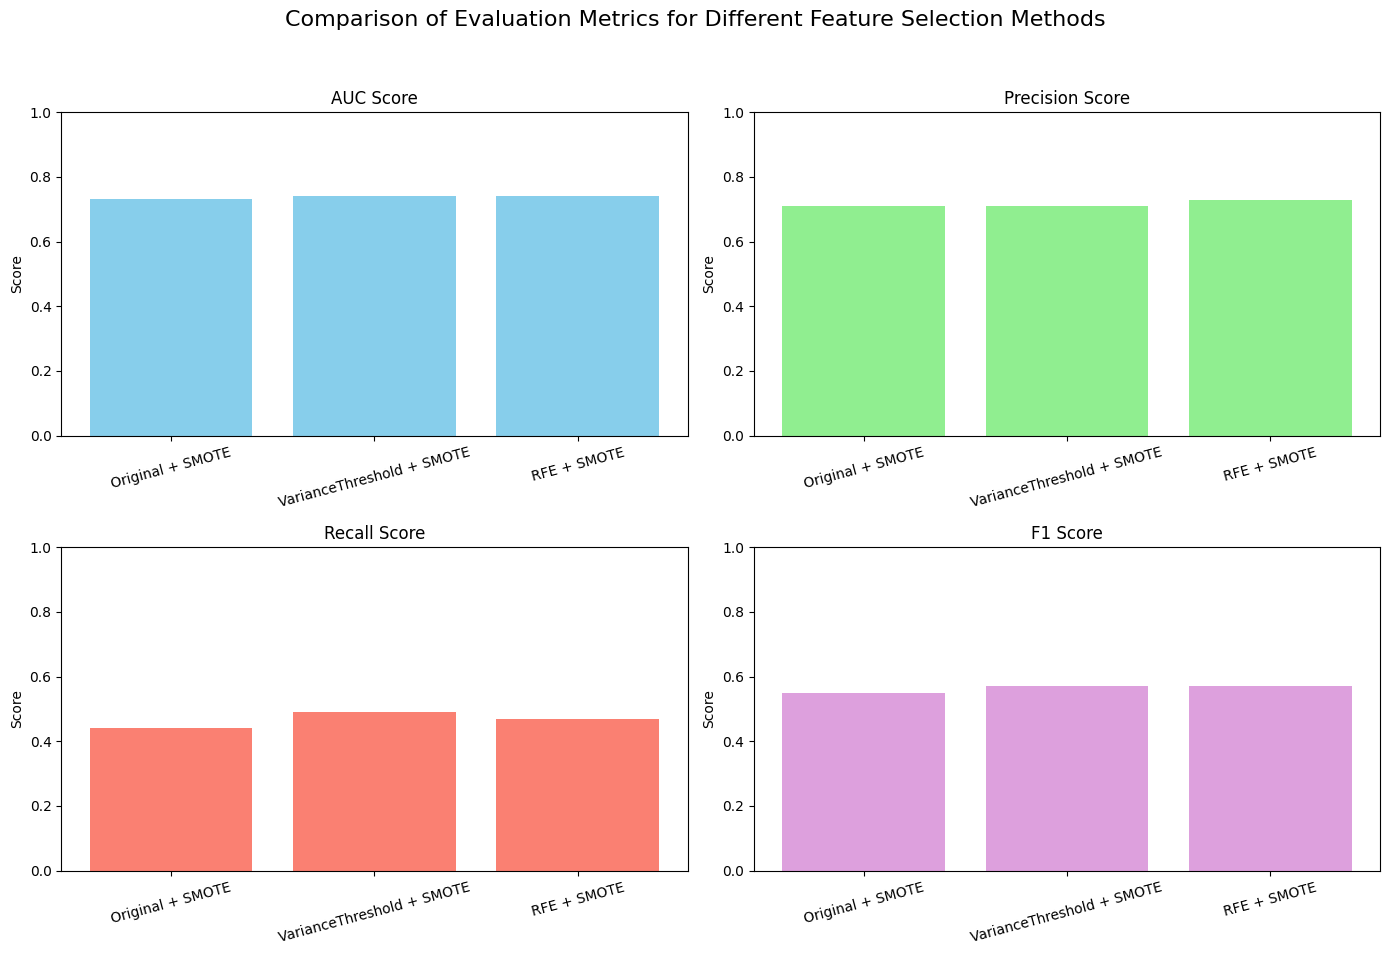

In [1]:
import matplotlib.pyplot as plt

# Nilai-nilai metrik dari ketiga metode
methods = ['Original + SMOTE', 'VarianceThreshold + SMOTE', 'RFE + SMOTE']
auc_scores = [0.7316, 0.7406, 0.7411]
precision_scores = [0.71, 0.71, 0.73]
recall_scores = [0.44, 0.49, 0.47]
f1_scores = [0.55, 0.57, 0.57]

# Plot semua metrik
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Evaluation Metrics for Different Feature Selection Methods', fontsize=16)

# AUC
axs[0, 0].bar(methods, auc_scores, color='skyblue')
axs[0, 0].set_title('AUC Score')
axs[0, 0].set_ylim(0, 1)

# Precision
axs[0, 1].bar(methods, precision_scores, color='lightgreen')
axs[0, 1].set_title('Precision Score')
axs[0, 1].set_ylim(0, 1)

# Recall
axs[1, 0].bar(methods, recall_scores, color='salmon')
axs[1, 0].set_title('Recall Score')
axs[1, 0].set_ylim(0, 1)

# F1 Score
axs[1, 1].bar(methods, f1_scores, color='plum')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 1)

for ax in axs.flat:
    ax.set_ylabel("Score")
    ax.set_xticklabels(methods, rotation=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
